In [6]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
from pdb import set_trace
%matplotlib notebook
style.use("ggplot")

centers = [[1,1,1],[5,5,5],[3,10,10]]

X, _ = make_blobs(n_samples = 1000, centers = centers, cluster_std = 1.5) 


[[  4.96153178   4.94913121   5.05953033]
 [  1.05161658   1.05607277   1.18829307]
 [  3.03162546   9.96799289  10.12578144]]
Number of estimated clusters: 3


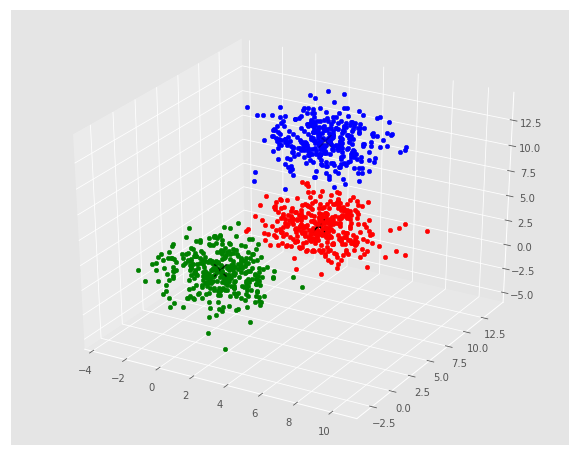

In [2]:
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
colors = 10* ['g','r','c','b','k']

print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

In [49]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import random

centers = random.randrange(2,5)
X, Y = make_blobs(n_samples=85,centers=centers,n_features=2)

##plt.scatter(X[:,0], X[:,1], s=150)
##plt.show()

colors = 10*["g","r","c","b","k"]

class Mean_Shift:
    def __init__(self, radius=None, randius_norm_steps=100):
        self.radius = radius
        self.randius_norm_steps = randius_norm_steps

    def fit(self, data):
        
        if self.radius == None:
            all_data_centroid = np.average(data,axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm / self.randius_norm_steps
            
        
        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]
        weights = [i for i in range(self.randius_norm_steps)][::-1]
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                
                for featureset in data:
                    distance= np.linalg.norm(featureset - centroid)
                    if distance ==0:
                        distance = 0.0000001
                    weight_index = int(distance / self.radius)
                    if weight_index > self.randius_norm_steps-1:
                        weight_index = self.randius_norm_steps-1
                    to_add = (weights[weight_index]**2)*[featureset]
                    in_bandwidth +=to_add
                
                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))
            
            to_pop = []
            
            for i in uniques:
                for ii in uniques:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i) - np.array(ii)) <=self.radius:
                        to_pop.append(ii)
                        break
            
            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass
                    
            
            prev_centroids = dict(centroids)

            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                
            if optimized:
                break

        self.centroids = centroids
        self.classifications = {}
        for i in range(len(self.centroids)):
            self.classifications[i] = []
        for featureset in data:
            distance = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            classification = distance.index(min(distance))
            self.classifications[classification].append(featureset)
                                                        

    def predict(self):
        distance = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.sentroids]
        classification = distance.index(min(distance))
        return classification
                                                    

clf1 = Mean_Shift()
clf1.fit(X)

centroids = clf1.centroids

for classification in clf1.classifications:
    color = colors[classification]
    for featureset in clf1.classifications[classification]:                                                
        plt.scatter(X[:,0], X[:,1], s=150, color = color)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()



> <ipython-input-49-ca16a8ce6f9b>(48)fit()
-> in_bandwidth +=to_add
(Pdb) l
 43  	                    weight_index = int(distance / self.radius)
 44  	                    if weight_index > self.randius_norm_steps-1:
 45  	                        weight_index = self.randius_norm_steps-1
 46  	                    to_add = (weights[weight_index]**2)*[featureset]
 47  	                    set_trace()
 48  ->	                    in_bandwidth +=to_add
 49  	
 50  	                new_centroid = np.average(in_bandwidth,axis=0)
 51  	                new_centroids.append(tuple(new_centroid))
 52  	
 53  	            uniques = sorted(list(set(new_centroids)))
(Pdb) distance
1e-07
(Pdb) radius
*** NameError: name 'radius' is not defined
(Pdb) self.radius
0.059404815300613562
(Pdb) weight_index 
0
(Pdb) featureset
array([ 8.55568175,  4.01423849])
(Pdb) c
> <ipython-input-49-ca16a8ce6f9b>(47)fit()
-> set_trace()
(Pdb) featureset
array([ 9.80408055,  4.22218887])
(Pdb) l
 42  	                     

(Pdb) featureset
array([ 9.80408055,  4.22218887])
(Pdb) c
> <ipython-input-49-ca16a8ce6f9b>(48)fit()
-> in_bandwidth +=to_add
(Pdb) q


BdbQuit: 